In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import ImageFile
from tensorflow.keras.applications import EfficientNetB0


In [3]:
ImageFile.LOAD_TRUNCATED = True

In [4]:
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model


In [5]:
# Ensure that truncated images are loaded
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Parameters
img_height = 224
img_width = 224
batch_size = 32
directory = r"/Users/shauryasharma/Downloads/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset"

# Load the training dataset
train_ds = image_dataset_from_directory(
    directory=directory,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 6900 files belonging to 80 classes.
Using 5520 files for training.


In [6]:

for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

validation_ds = image_dataset_from_directory(
    directory=directory,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 80)
Found 6900 files belonging to 80 classes.
Using 1380 files for validation.


2024-07-03 11:43:35.077061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
class_names = train_ds.class_names
print(class_names)


['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamakasturi', 'kepala']


In [8]:
# Define the model
efficientnet_model = Sequential()


In [9]:
# Load the pretrained EfficientNetB0 model
pretrained_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    weights='imagenet',
)


In [10]:
# Freeze the layers of the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False


In [11]:
# Add the pretrained model to the sequential model
efficientnet_model.add(pretrained_model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512, activation='relu'))
efficientnet_model.add(Dense(len(class_names), activation='softmax'))

In [12]:
efficientnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [13]:
efficientnet_model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
epochs = 20
history = efficientnet_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs
)

Epoch 1/20
 16/173 ━━━━━━━━━━━━━━━━━━━━ 1:18 497ms/step - accuracy: 0.0809 - loss: 4.2368

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


147/173 ━━━━━━━━━━━━━━━━━━━━ 13s 523ms/step - accuracy: 0.3544 - loss: 2.8867

Corrupt JPEG data: premature end of data segment


162/173 ━━━━━━━━━━━━━━━━━━━━ 5s 525ms/step - accuracy: 0.3732 - loss: 2.7932

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 119s 667ms/step - accuracy: 0.3871 - loss: 2.7244 - val_accuracy: 0.8217 - val_loss: 0.7121
Epoch 2/20
 16/173 ━━━━━━━━━━━━━━━━━━━━ 1:29 569ms/step - accuracy: 0.8734 - loss: 0.5065

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


149/173 ━━━━━━━━━━━━━━━━━━━━ 14s 586ms/step - accuracy: 0.8667 - loss: 0.5277

Corrupt JPEG data: premature end of data segment


155/173 ━━━━━━━━━━━━━━━━━━━━ 10s 586ms/step - accuracy: 0.8673 - loss: 0.5254

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 127s 733ms/step - accuracy: 0.8692 - loss: 0.5184 - val_accuracy: 0.8942 - val_loss: 0.3935
Epoch 3/20
 19/173 ━━━━━━━━━━━━━━━━━━━━ 1:41 656ms/step - accuracy: 0.9500 - loss: 0.2386

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


147/173 ━━━━━━━━━━━━━━━━━━━━ 17s 662ms/step - accuracy: 0.9439 - loss: 0.2412

Corrupt JPEG data: premature end of data segment


155/173 ━━━━━━━━━━━━━━━━━━━━ 11s 658ms/step - accuracy: 0.9442 - loss: 0.2403

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 138s 795ms/step - accuracy: 0.9447 - loss: 0.2381 - val_accuracy: 0.9101 - val_loss: 0.3216
Epoch 4/20
 32/173 ━━━━━━━━━━━━━━━━━━━━ 1:23 594ms/step - accuracy: 0.9656 - loss: 0.1459

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


153/173 ━━━━━━━━━━━━━━━━━━━━ 11s 590ms/step - accuracy: 0.9676 - loss: 0.1393

Corrupt JPEG data: premature end of data segment


155/173 ━━━━━━━━━━━━━━━━━━━━ 10s 591ms/step - accuracy: 0.9676 - loss: 0.1393

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 128s 735ms/step - accuracy: 0.9679 - loss: 0.1384 - val_accuracy: 0.9239 - val_loss: 0.2555
Epoch 5/20
 30/173 ━━━━━━━━━━━━━━━━━━━━ 1:24 592ms/step - accuracy: 0.9848 - loss: 0.0855

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


153/173 ━━━━━━━━━━━━━━━━━━━━ 12s 637ms/step - accuracy: 0.9859 - loss: 0.0851

Corrupt JPEG data: premature end of data segment


156/173 ━━━━━━━━━━━━━━━━━━━━ 10s 636ms/step - accuracy: 0.9859 - loss: 0.0851

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 138s 798ms/step - accuracy: 0.9857 - loss: 0.0850 - val_accuracy: 0.9246 - val_loss: 0.2448
Epoch 6/20
 24/173 ━━━━━━━━━━━━━━━━━━━━ 1:42 689ms/step - accuracy: 0.9920 - loss: 0.0607

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


162/173 ━━━━━━━━━━━━━━━━━━━━ 7s 661ms/step - accuracy: 0.9880 - loss: 0.0691

Corrupt JPEG data: premature end of data segment


166/173 ━━━━━━━━━━━━━━━━━━━━ 4s 659ms/step - accuracy: 0.9880 - loss: 0.0691

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 140s 806ms/step - accuracy: 0.9880 - loss: 0.0690 - val_accuracy: 0.9188 - val_loss: 0.2663
Epoch 7/20
 24/173 ━━━━━━━━━━━━━━━━━━━━ 1:38 664ms/step - accuracy: 0.9891 - loss: 0.0528

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


157/173 ━━━━━━━━━━━━━━━━━━━━ 10s 661ms/step - accuracy: 0.9905 - loss: 0.0560

Corrupt JPEG data: premature end of data segment


166/173 ━━━━━━━━━━━━━━━━━━━━ 4s 660ms/step - accuracy: 0.9905 - loss: 0.0560

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 141s 814ms/step - accuracy: 0.9906 - loss: 0.0559 - val_accuracy: 0.9116 - val_loss: 0.2877
Epoch 8/20
 32/173 ━━━━━━━━━━━━━━━━━━━━ 1:36 686ms/step - accuracy: 0.9905 - loss: 0.0531

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


154/173 ━━━━━━━━━━━━━━━━━━━━ 12s 683ms/step - accuracy: 0.9914 - loss: 0.0466

Corrupt JPEG data: premature end of data segment


166/173 ━━━━━━━━━━━━━━━━━━━━ 4s 681ms/step - accuracy: 0.9915 - loss: 0.0464

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 843ms/step - accuracy: 0.9916 - loss: 0.0463 - val_accuracy: 0.9355 - val_loss: 0.2303
Epoch 9/20
 46/173 ━━━━━━━━━━━━━━━━━━━━ 1:25 672ms/step - accuracy: 0.9930 - loss: 0.0311

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


149/173 ━━━━━━━━━━━━━━━━━━━━ 16s 668ms/step - accuracy: 0.9930 - loss: 0.0334

Corrupt JPEG data: premature end of data segment


167/173 ━━━━━━━━━━━━━━━━━━━━ 4s 667ms/step - accuracy: 0.9928 - loss: 0.0340

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 830ms/step - accuracy: 0.9927 - loss: 0.0342 - val_accuracy: 0.9399 - val_loss: 0.2001
Epoch 10/20
 44/173 ━━━━━━━━━━━━━━━━━━━━ 1:29 697ms/step - accuracy: 0.9926 - loss: 0.0306

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


154/173 ━━━━━━━━━━━━━━━━━━━━ 15s 809ms/step - accuracy: 0.9932 - loss: 0.0316

Corrupt JPEG data: premature end of data segment


155/173 ━━━━━━━━━━━━━━━━━━━━ 14s 809ms/step - accuracy: 0.9932 - loss: 0.0316

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 168s 971ms/step - accuracy: 0.9932 - loss: 0.0319 - val_accuracy: 0.9370 - val_loss: 0.2615
Epoch 11/20
 22/173 ━━━━━━━━━━━━━━━━━━━━ 1:44 695ms/step - accuracy: 0.9947 - loss: 0.0304

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


156/173 ━━━━━━━━━━━━━━━━━━━━ 11s 683ms/step - accuracy: 0.9923 - loss: 0.0362

Corrupt JPEG data: premature end of data segment


157/173 ━━━━━━━━━━━━━━━━━━━━ 10s 683ms/step - accuracy: 0.9923 - loss: 0.0362

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 832ms/step - accuracy: 0.9923 - loss: 0.0360 - val_accuracy: 0.9355 - val_loss: 0.2266
Epoch 12/20
 23/173 ━━━━━━━━━━━━━━━━━━━━ 1:34 630ms/step - accuracy: 0.9972 - loss: 0.0236

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


147/173 ━━━━━━━━━━━━━━━━━━━━ 16s 635ms/step - accuracy: 0.9955 - loss: 0.0267

Corrupt JPEG data: premature end of data segment


167/173 ━━━━━━━━━━━━━━━━━━━━ 3s 635ms/step - accuracy: 0.9953 - loss: 0.0275

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 136s 785ms/step - accuracy: 0.9952 - loss: 0.0277 - val_accuracy: 0.9341 - val_loss: 0.2360
Epoch 13/20
 20/173 ━━━━━━━━━━━━━━━━━━━━ 1:52 734ms/step - accuracy: 0.9926 - loss: 0.0246

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


164/173 ━━━━━━━━━━━━━━━━━━━━ 6s 721ms/step - accuracy: 0.9951 - loss: 0.0234

Corrupt JPEG data: premature end of data segment


165/173 ━━━━━━━━━━━━━━━━━━━━ 5s 721ms/step - accuracy: 0.9951 - loss: 0.0235

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 152s 877ms/step - accuracy: 0.9950 - loss: 0.0236 - val_accuracy: 0.9377 - val_loss: 0.2293
Epoch 14/20
 23/173 ━━━━━━━━━━━━━━━━━━━━ 1:36 645ms/step - accuracy: 0.9851 - loss: 0.0344

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


151/173 ━━━━━━━━━━━━━━━━━━━━ 14s 660ms/step - accuracy: 0.9895 - loss: 0.0312

Corrupt JPEG data: premature end of data segment


154/173 ━━━━━━━━━━━━━━━━━━━━ 12s 659ms/step - accuracy: 0.9895 - loss: 0.0312

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 143s 820ms/step - accuracy: 0.9895 - loss: 0.0315 - val_accuracy: 0.9377 - val_loss: 0.2211
Epoch 15/20
 32/173 ━━━━━━━━━━━━━━━━━━━━ 1:41 720ms/step - accuracy: 0.9867 - loss: 0.0532

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


156/173 ━━━━━━━━━━━━━━━━━━━━ 12s 717ms/step - accuracy: 0.9879 - loss: 0.0472

Corrupt JPEG data: premature end of data segment


166/173 ━━━━━━━━━━━━━━━━━━━━ 5s 717ms/step - accuracy: 0.9880 - loss: 0.0469

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 901ms/step - accuracy: 0.9881 - loss: 0.0466 - val_accuracy: 0.9268 - val_loss: 0.2619
Epoch 16/20
 19/173 ━━━━━━━━━━━━━━━━━━━━ 1:49 712ms/step - accuracy: 0.9905 - loss: 0.0273

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


147/173 ━━━━━━━━━━━━━━━━━━━━ 18s 701ms/step - accuracy: 0.9913 - loss: 0.0320

Corrupt JPEG data: premature end of data segment


154/173 ━━━━━━━━━━━━━━━━━━━━ 13s 701ms/step - accuracy: 0.9912 - loss: 0.0322

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 888ms/step - accuracy: 0.9911 - loss: 0.0330 - val_accuracy: 0.9159 - val_loss: 0.2734
Epoch 17/20
 32/173 ━━━━━━━━━━━━━━━━━━━━ 1:51 794ms/step - accuracy: 0.9935 - loss: 0.0249

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


154/173 ━━━━━━━━━━━━━━━━━━━━ 14s 761ms/step - accuracy: 0.9907 - loss: 0.0350

Corrupt JPEG data: premature end of data segment


158/173 ━━━━━━━━━━━━━━━━━━━━ 11s 758ms/step - accuracy: 0.9907 - loss: 0.0352

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 160s 918ms/step - accuracy: 0.9905 - loss: 0.0359 - val_accuracy: 0.9312 - val_loss: 0.2436
Epoch 18/20
 25/173 ━━━━━━━━━━━━━━━━━━━━ 1:36 654ms/step - accuracy: 0.9977 - loss: 0.0202

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


155/173 ━━━━━━━━━━━━━━━━━━━━ 12s 688ms/step - accuracy: 0.9929 - loss: 0.0295

Corrupt JPEG data: premature end of data segment


158/173 ━━━━━━━━━━━━━━━━━━━━ 10s 688ms/step - accuracy: 0.9929 - loss: 0.0296

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 150s 863ms/step - accuracy: 0.9927 - loss: 0.0298 - val_accuracy: 0.9355 - val_loss: 0.2425
Epoch 19/20
 26/173 ━━━━━━━━━━━━━━━━━━━━ 1:36 655ms/step - accuracy: 0.9835 - loss: 0.0487

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


146/173 ━━━━━━━━━━━━━━━━━━━━ 18s 694ms/step - accuracy: 0.9906 - loss: 0.0347

Corrupt JPEG data: premature end of data segment


165/173 ━━━━━━━━━━━━━━━━━━━━ 5s 687ms/step - accuracy: 0.9908 - loss: 0.0340

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 840ms/step - accuracy: 0.9909 - loss: 0.0337 - val_accuracy: 0.9326 - val_loss: 0.2484
Epoch 20/20
 20/173 ━━━━━━━━━━━━━━━━━━━━ 1:47 701ms/step - accuracy: 0.9984 - loss: 0.0103

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


147/173 ━━━━━━━━━━━━━━━━━━━━ 17s 661ms/step - accuracy: 0.9958 - loss: 0.0173

Corrupt JPEG data: premature end of data segment


166/173 ━━━━━━━━━━━━━━━━━━━━ 4s 660ms/step - accuracy: 0.9954 - loss: 0.0184

Corrupt JPEG data: premature end of data segment


173/173 ━━━━━━━━━━━━━━━━━━━━ 144s 832ms/step - accuracy: 0.9953 - loss: 0.0188 - val_accuracy: 0.9391 - val_loss: 0.2347


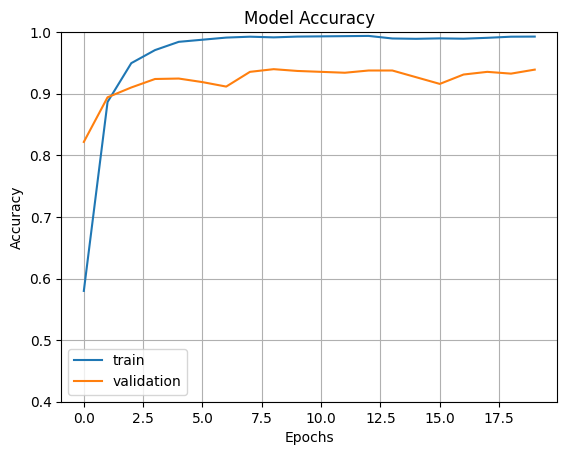

In [15]:
# Plotting the training history
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0.4, 1)  # Corrected to use plt.ylim instead of plt.axis for y-axis limits
plt.grid()  # Corrected extra space before period
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


In [18]:
# Load and preprocess a single image for prediction
import cv2
image = cv2.imread("/Users/shauryasharma/Downloads/amalaleaves.webp")
image_resized = cv2.resize(image, (224, 224))
image = np.expand_dims(image_resized, axis=0)
image = image / 255.0  # Normalize the image to [0, 1]
print(image.shape)

# Make predictions
pred = efficientnet_model.predict(image)
print(pred)



(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00974603 0.0147614  0.01356063 0.0105316  0.02003814 0.01522052
  0.01361775 0.01634361 0.01844939 0.01937917 0.00956812 0.0127593
  0.02626929 0.0081197  0.01103923 0.0131288  0.00962898 0.01342094
  0.01118787 0.01344091 0.01471101 0.02388085 0.02404963 0.01425319
  0.02522441 0.00992878 0.00911418 0.01025209 0.0103912  0.00761286
  0.02144244 0.02131859 0.01089647 0.01225433 0.0138401  0.01344964
  0.0168517  0.01229861 0.01507897 0.00825193 0.00992174 0.00804744
  0.01854224 0.00557952 0.01676091 0.0081682  0.00834319 0.01392858
  0.01160983 0.01318601 0.01411685 0.00920183 0.00773362 0.00500158
  0.01298223 0.01431295 0.00551281 0.0085652  0.01211025 0.00669612
  0.01214723 0.0108696  0.00686972 0.01156153 0.01681529 0.00489341
  0.01106167 0.01413016 0.00550787 0.01193259 0.01013824 0.01975005
  0.01266275 0.00703214 0.00757255 0.01032697 0.01414137 0.00714033
  0.0134073  0.0064059 ]]


In [19]:
# Get the predicted class
output_class = class_names[np.argmax(pred)]
print(output_class)

Caricature


44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 521ms/step


2024-07-03 12:43:27.169850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


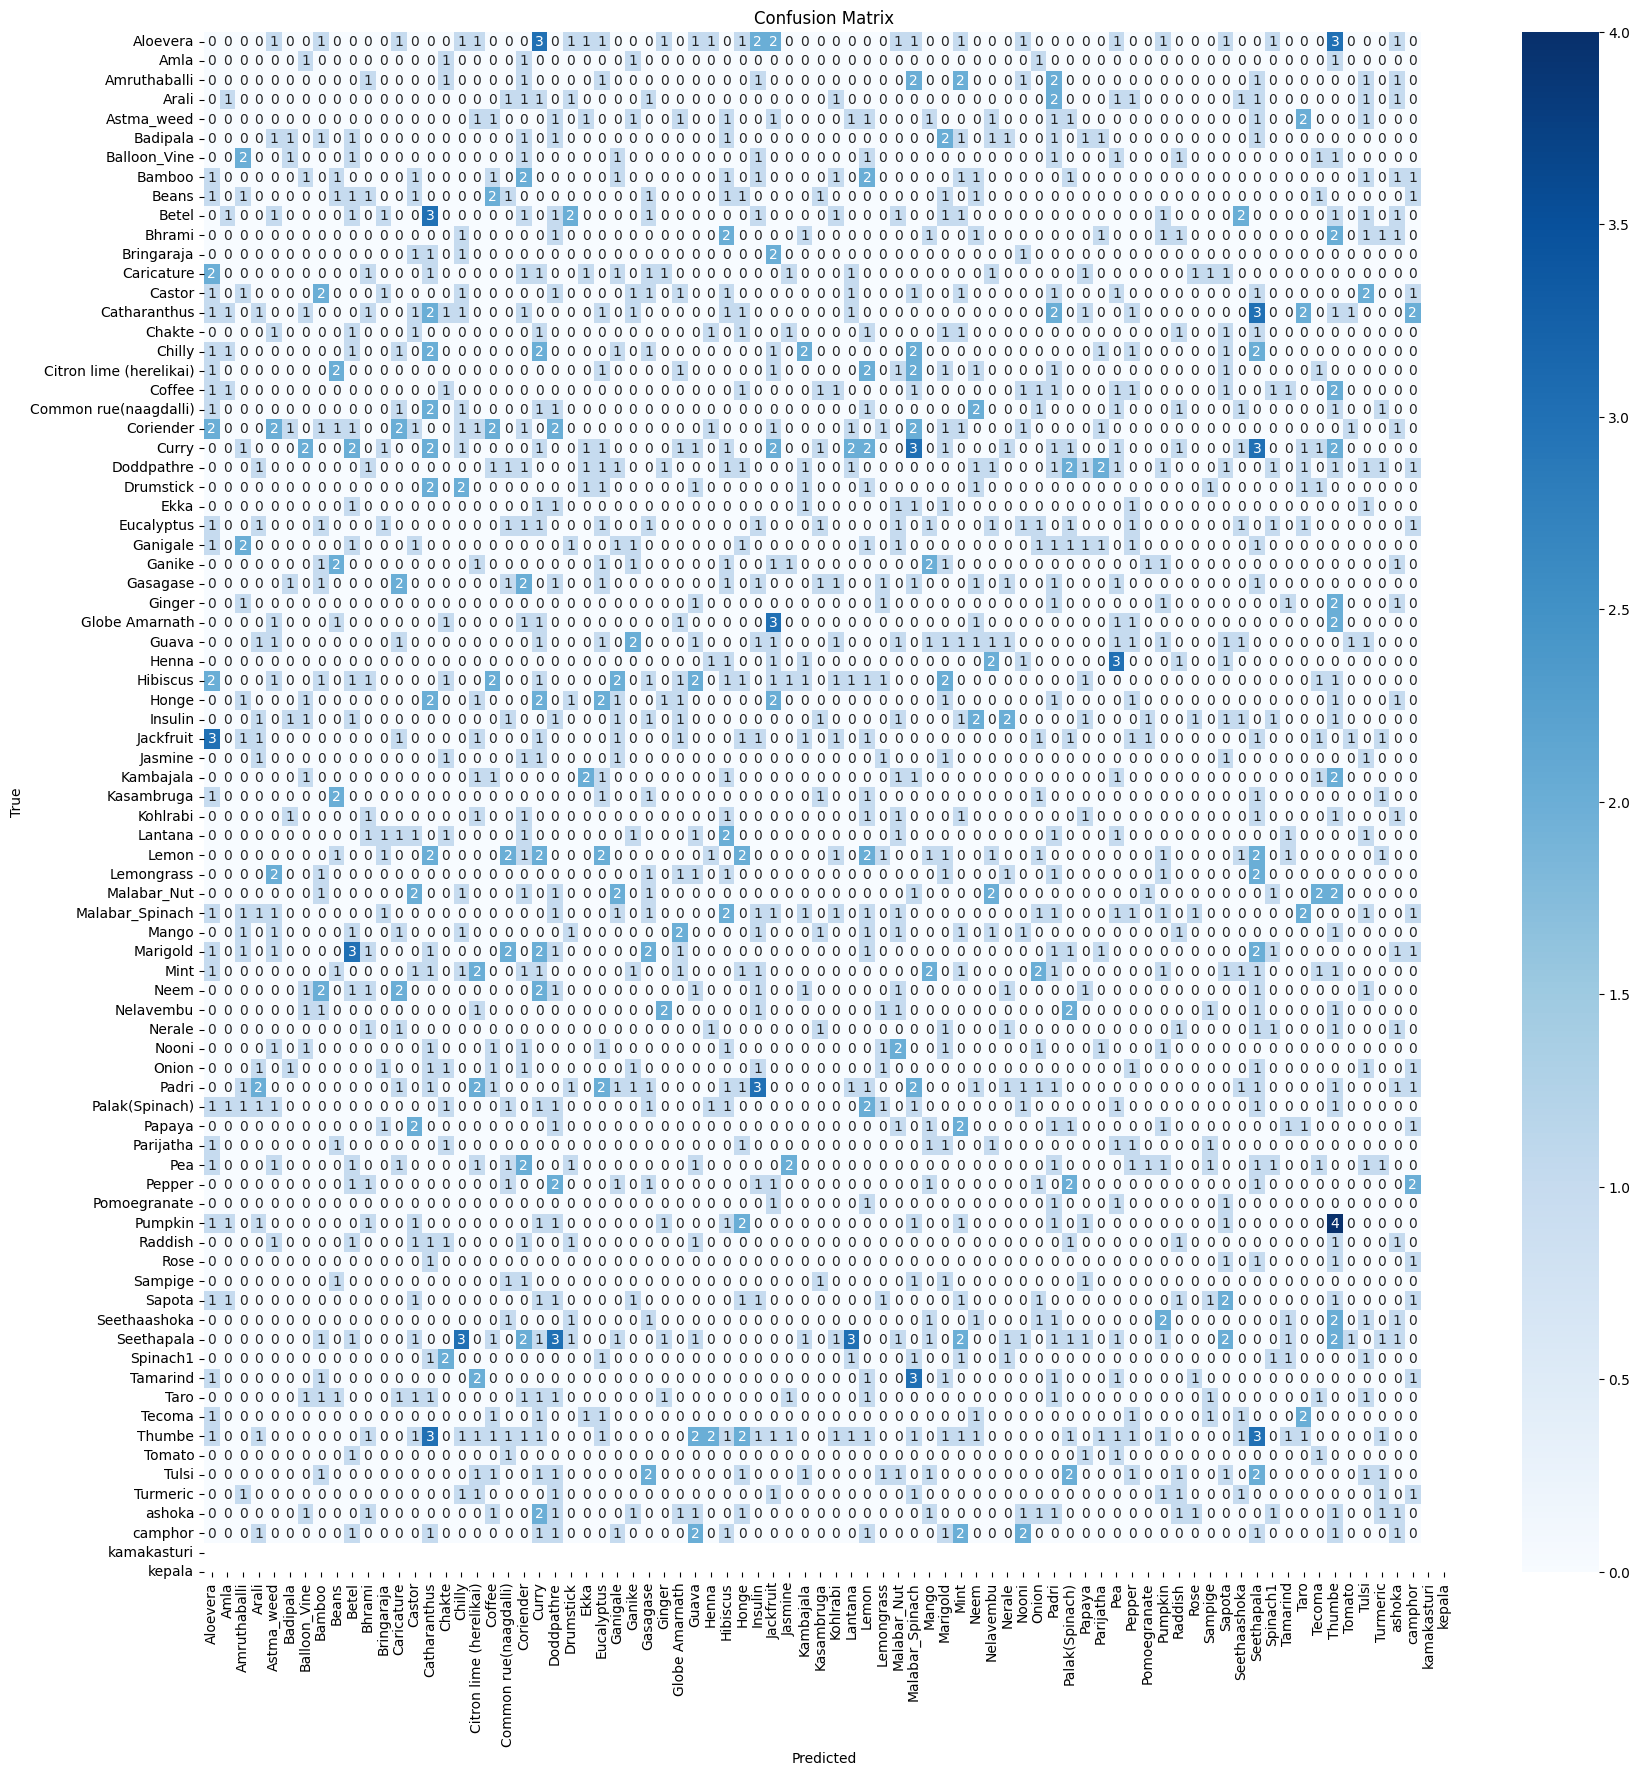

In [22]:
# Generate predictions and plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = efficientnet_model.predict(validation_ds)
y_pred = np.argmax(Y_pred, axis=1)

# Compute the confusion matrix
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
efficientnet_model.save("/Users/shauryasharma/Desktop/Saved Models/EfficientNet.keras")